# Exercícios Aula 2

## Importando as bibliotecas que serão usadas

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

plt.style.use("ggplot")
np.random.seed(0)

## Exercícios

### 1 - Gere dados a partir de uma distribuição de Poisson. Varie a taxas $ \lambda $ no intervalo [1,10] e mostre o gráfico da média em função da variância.

In [47]:
n_pontos = 100
lambda_intervalo = [1, 11] # Intervalo para gerar lambda, de i[inicial] até (i[final] - 1)

# Vamos gerar λ de 1 a 10
distribucoes = [np.random.poisson(i, n_pontos) for i in range(lambda_intervalo[0], lambda_intervalo[1])]

distribucoes

[array([2, 1, 1, 2, 2, 1, 0, 0, 5, 1, 1, 2, 0, 1, 1, 2, 2, 1, 0, 2, 0, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 3, 1, 0, 0, 0, 0, 0, 1,
        2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 1, 2, 1, 0, 1, 1,
        0, 0, 1, 2, 2, 2, 1, 3, 1, 1, 3, 0, 1, 4, 0, 1, 1, 0, 0, 1, 0, 2,
        0, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 1]),
 array([2, 0, 0, 5, 2, 2, 4, 3, 3, 1, 0, 1, 2, 2, 1, 3, 1, 5, 3, 1, 0, 4,
        0, 4, 4, 3, 0, 1, 4, 1, 1, 1, 6, 1, 0, 0, 1, 1, 0, 0, 2, 3, 0, 0,
        1, 3, 1, 1, 3, 2, 1, 1, 1, 2, 2, 2, 2, 2, 4, 4, 3, 1, 4, 5, 2, 1,
        1, 2, 0, 1, 1, 3, 2, 0, 1, 1, 1, 0, 0, 4, 3, 2, 2, 2, 2, 3, 1, 6,
        0, 3, 3, 2, 1, 2, 6, 3, 1, 1, 4, 3]),
 array([3, 2, 3, 2, 2, 5, 4, 0, 1, 3, 1, 3, 2, 2, 4, 5, 3, 4, 5, 4, 3, 4,
        2, 2, 1, 7, 3, 2, 3, 3, 2, 5, 8, 1, 4, 2, 5, 3, 3, 2, 3, 2, 3, 4,
        2, 2, 3, 2, 3, 1, 3, 1, 3, 1, 1, 1, 2, 3, 2, 4, 7, 2, 3, 1, 0, 1,
        2, 6, 3, 0, 3, 5, 4, 2, 4, 3, 1, 1, 2, 4, 2, 0, 6, 4, 2, 3, 1, 1,
        2, 4, 5, 3, 

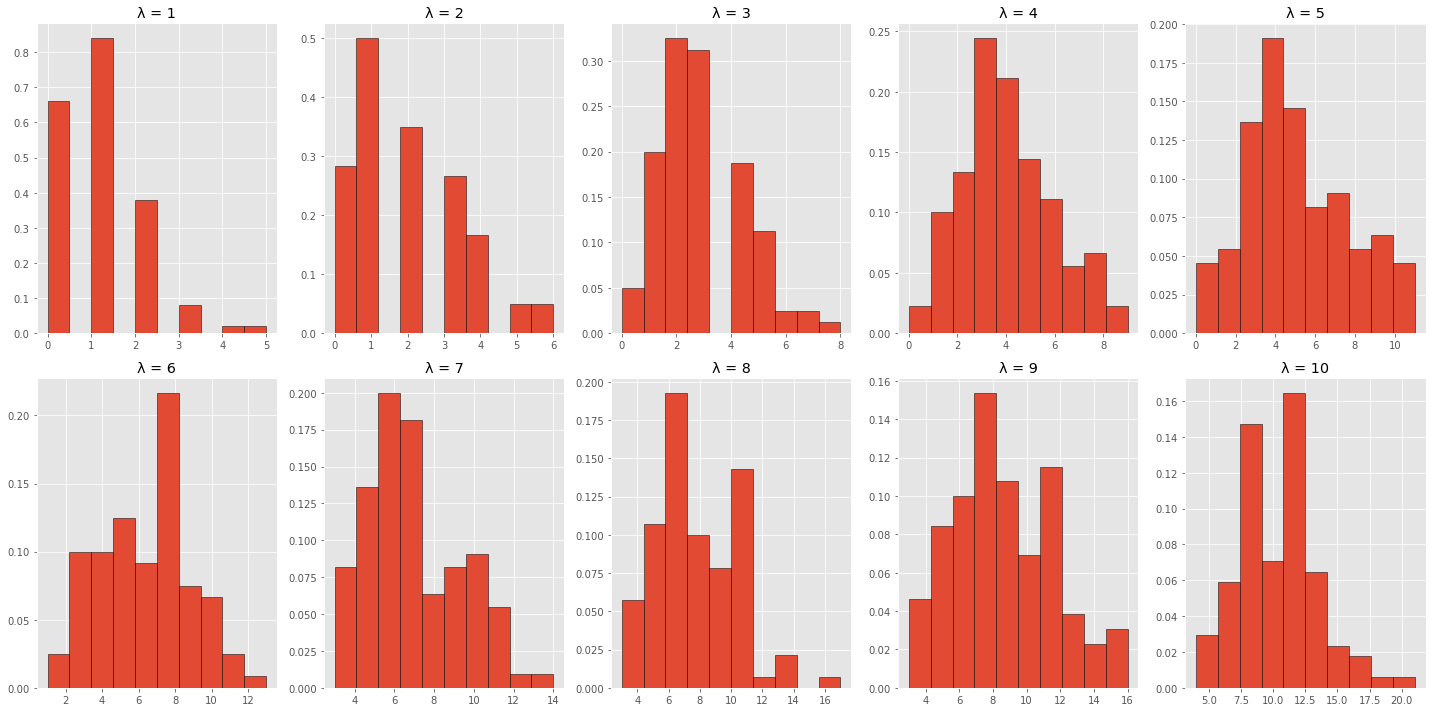

In [53]:
# Agora gera os gráficos com as distribuições

figure, axes = plt.subplots(2, 5, figsize = (20,10))

for i in range(len(distribucoes)):
    axes_index = (int(i / int(len(distribucoes) / 2)) % int(len(distribucoes) / 2),  i % int(len(distribucoes) / 2))
    axes[axes_index].set_title("λ = {}".format(range(lambda_intervalo[0], lambda_intervalo[1])[i]))
    axes[axes_index].hist(distribucoes[i], density = True, edgeColor = "black")

figure.tight_layout()
figure.show()

### 2 - Considere os dados da Iris. Calcule a média, variância e IQR para cada atributo.

In [59]:
# Lê os dados do arquivo .csv
data = pd.read_csv("data/iris.csv")

data.sample(10).head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
132,6.4,2.8,5.6,2.2,virginica
1,4.9,3.0,1.4,0.2,setosa
52,6.9,3.1,4.9,1.5,versicolor
148,6.2,3.4,5.4,2.3,virginica
136,6.3,3.4,5.6,2.4,virginica
13,4.3,3.0,1.1,0.1,setosa
147,6.5,3.0,5.2,2.0,virginica
101,5.8,2.7,5.1,1.9,virginica
35,5.0,3.2,1.2,0.2,setosa
23,5.1,3.3,1.7,0.5,setosa


In [63]:
# Cálculo da variância
variancia = data.var()

variancia

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64

In [65]:
# Cálculo da media
media = data.mean()

media

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [66]:
# Cálculo da mediana

mediana = data.median()

mediana

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [70]:
# Cálculo do iqr

iqr = data.quantile(0.75) - data.quantile(0.25)

iqr

sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64

### 3 - Obtenha o boxplot de todas as variáveis da flor Iris, para cada espécie.

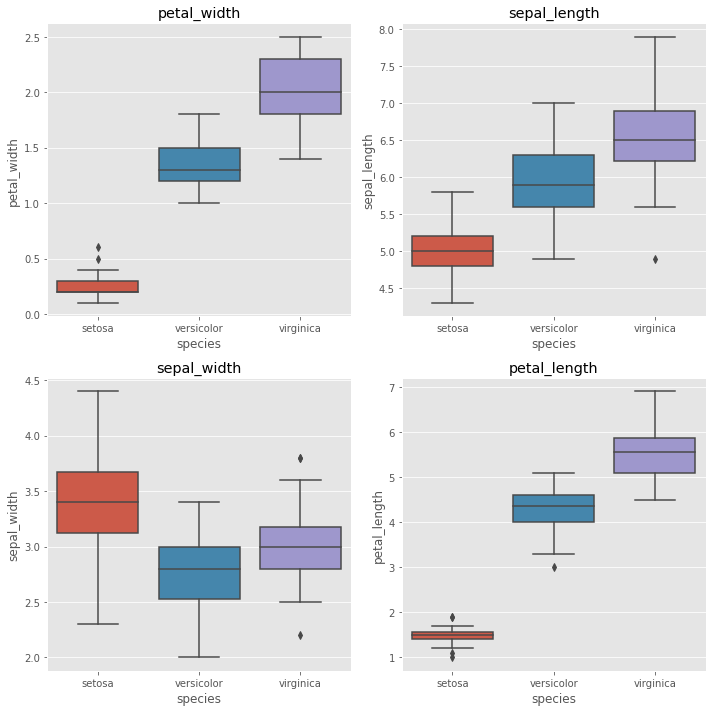

In [84]:
figure = plt.figure(figsize = (10,10))
gridspec = figure.add_gridspec(2, 2)

i = 0
for column in data.columns:
    if column != "species":
        i = i + 1
        ax = figure.add_subplot(gridspec[int((i / 2) % 2), i % 2])

        column_boxplot = sns.boxplot(x = "species", y = column, data = data)
        column_boxplot.set_title(column)

figure.tight_layout()
figure.show()

### 4 - Para a função log(), investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.

In [3]:
# Gera n dados em um intervalo [a, b] e aplica a função logaritma
def gerar_dados_log(a, b, n):
    x = np.linspace(a, b, n)
    y = np.log(x)
    return [x, y]

# Gera dados de log para intervalos aleatorios
dados_gerados_log = []

for i in range(0, 10):
    low = np.random.randint(low = i + 1, high = (i + 10) * 10)
    high = np.random.randint(low = low + 1, high = 10 * (low + 2)^3)
    
    dados_gerados_log.append([low, high, gerar_dados_log(low, high, 1000)])



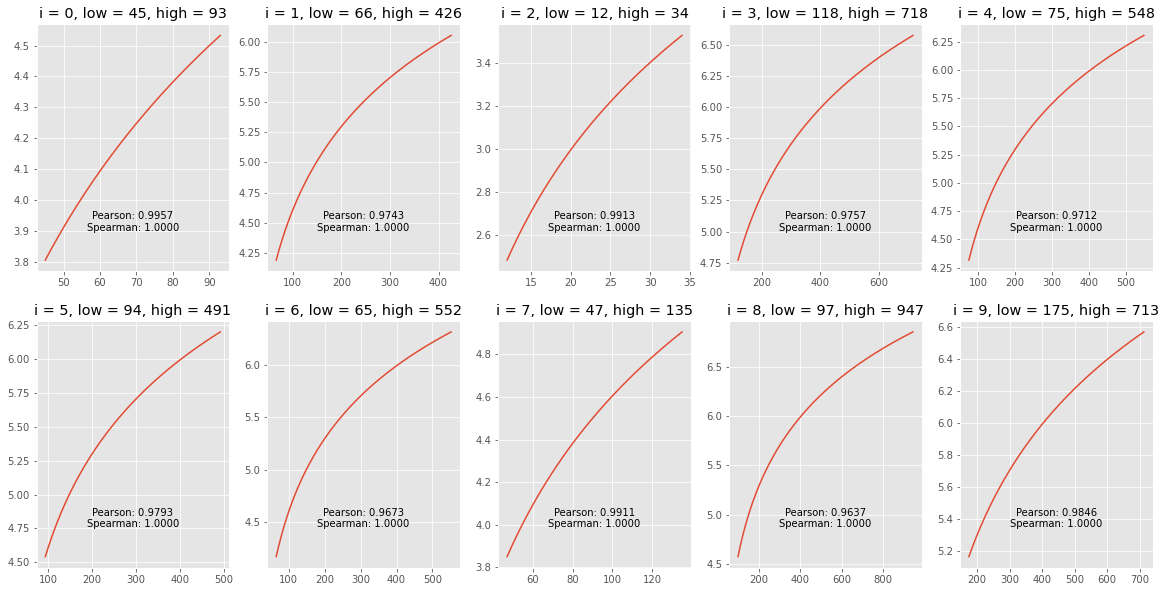

In [22]:
figure, axes = plt.subplots(2, 5, figsize = (20, 10))

for i in range(len(dados_gerados_log)):
    axes_index = (int(i / int(len(dados_gerados_log) / 2)) % int(len(dados_gerados_log) / 2),  i % int(len(dados_gerados_log) / 2))
    axes[axes_index].set_title("i = {}, low = {}, high = {}".format(i, dados_gerados_log[i][0], dados_gerados_log[i][1]))
    axes[axes_index].plot(dados_gerados_log[i][2][0], dados_gerados_log[i][2][1])
    axes[axes_index].text(0.5, 0.2, "Pearson: {:.4f}\nSpearman: {:.4f}".format(
        pearsonr(dados_gerados_log[i][2][0], dados_gerados_log[i][2][1])[0],
        spearmanr(dados_gerados_log[i][2][0], dados_gerados_log[i][2][1])[0]),
    horizontalalignment = "center", verticalalignment = "center", transform = axes[axes_index].transAxes)

### 5 - Considere o código acima que mostra como a correlação de Pearson muda com a inclusão de ruídos. Modifique a função para $Y = 0.5*X +\text{ruído}$. Varie o ruído e calcule os coeficientes de Pearson e Spearman, mostrando os respectivos scatterplots com os valores dos coeficientes (como feito no exemplo).

### 6 - Considere os dados abaixo, chamado quarteto de Ascomb. Calcule a média, variância, correlação de Pearson e Spearman entre as variáveis x e y. O que você pode dizer sobre esses dados?

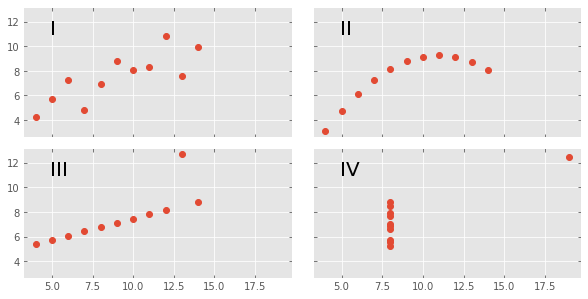

In [24]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 5),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')
plt.show()

In [4]:
# Calculo da média

for i in range(len(datasets)):
    print("Média de {}: {}".format(list(datasets.keys())[i], np.mean(datasets[list(datasets.keys())[i]][1])))

Média de I: 7.500909090909093
Média de II: 7.50090909090909
Média de III: 7.5
Média de IV: 7.500909090909091


In [5]:
# Cálculo da mediana

for i in range(len(datasets)):
    print("Mediana de {}: {}".format(list(datasets.keys())[i], np.median(datasets[list(datasets.keys())[i]][1])))

Mediana de I: 7.58
Mediana de II: 8.14
Mediana de III: 7.11
Mediana de IV: 7.04


In [6]:
# Cálculo da variância

for i in range(len(datasets)):
    print("Variância de {}: {}".format(list(datasets.keys())[i], np.var(datasets[list(datasets.keys())[i]][1])))

Variância de I: 3.7520628099173554
Variância de II: 3.752390082644628
Variância de III: 3.747836363636364
Variância de IV: 3.7484082644628103


In [43]:
# Cálculo da correlação de Pearson e Spearman

for i in range(len(datasets)):
   print("Correlação de X e Y em '{}':".format(list(datasets.keys())[i]))
   print("Pearson\t\tSpearman")
   print("{:.4f}\t\t{:.4f}\n".format(
       pearsonr(datasets[list(datasets.keys())[i]][0], datasets[list(datasets.keys())[i]][1])[0],
       spearmanr(datasets[list(datasets.keys())[i]][0], datasets[list(datasets.keys())[i]][1])[0])
    )


Correlação de X e Y em &#39;I&#39;:
Pearson		Spearman
0.8164		0.8182

Correlação de X e Y em &#39;II&#39;:
Pearson		Spearman
0.8162		0.6909

Correlação de X e Y em &#39;III&#39;:
Pearson		Spearman
0.8163		0.9909

Correlação de X e Y em &#39;IV&#39;:
Pearson		Spearman
0.8165		0.5000



Analisando os datas apenas observando as médias, medianas e variância não iria dizer muito sobre os dados, apenas que eles possuem essas estatísticas bem próximas uma das outras, porém observando os valores obtidos na coficiência de Pearson e Spearman foi possível obter:

**Pela correlação de Pearson e Spearman:**
- No dataset `I` temos que a correlção tanto de Pearson e Spearman indica uma correlação positiva forte.
- No dataset `II` temos que a correlação de Pearson indica uma correlação positiva forte e a de Spearman indica uma correlação positiva moderada.
- No dataqset `III` temos que a correlação de Pearson indica uma correlação positiva forte e de Spearman indica uma correlação positiva muito forte.
- No dataset `IV` temos que a correlação de Pearson indica uma correlação positiva forte e a de Spearman indica uma correlação positiva moderada.

Foi isso que conseguimos analisar, dado que não temos mais informações sobre as variáveis não podemos implicar nenhum caso de depedência ou indepedência.